In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
# # 1. 設定隨機種子以確保結果可重複
# np.random.seed(42)

# # 2. 生成資料
# # 定義函數 y = sin(x) + e, e ~ N(0, 0.001)
# def target_func(x):
#     return np.sin(x)

# n_samples = 100
# X_train = np.sort(np.random.uniform(0, 5, n_samples))[:, np.newaxis]
# noise = 0 #np.random.normal(0, np.sqrt(0.001), n_samples)
# y_train = target_func(X_train).ravel() + noise

# # 3. 定義高斯過程核函數 (Kernel)
# # 我們使用 RBF (徑向基函數) 並加上一個常數項
# kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# # 4. 建立並訓練高斯過程回歸模型
# # alpha 是雜訊的變異數 (0.001)
# gp = GaussianProcessRegressor(kernel=kernel, alpha=0.01, n_restarts_optimizer=10)
# gp.fit(X_train, y_train)

# # 5. 進行預測
# X_plot = np.linspace(0, 5, 100)[:, np.newaxis]
# y_pred, sigma = gp.predict(X_plot, return_std=True)

# # 6. 繪圖
# plt.figure(figsize=(10, 6))
# plt.plot(X_plot, target_func(X_plot), 'r:', label=r'$f(x) = \sin(x)$')
# plt.errorbar(X_train.ravel(), y_train, 0.0316, fmt='r.', markersize=10, label='Observations (Noise)')
# plt.plot(X_plot, y_pred, 'b-', label='GP Prediction')
# plt.fill_between(X_plot.ravel(), y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, 
#                  alpha=0.2, color='blue', label='95% Confidence Interval')
# plt.title("Gaussian Process Regression on Sinusoidal Data")
# plt.xlabel("x")
# plt.ylabel("y")
# plt.legend(loc="upper right")
# plt.show()

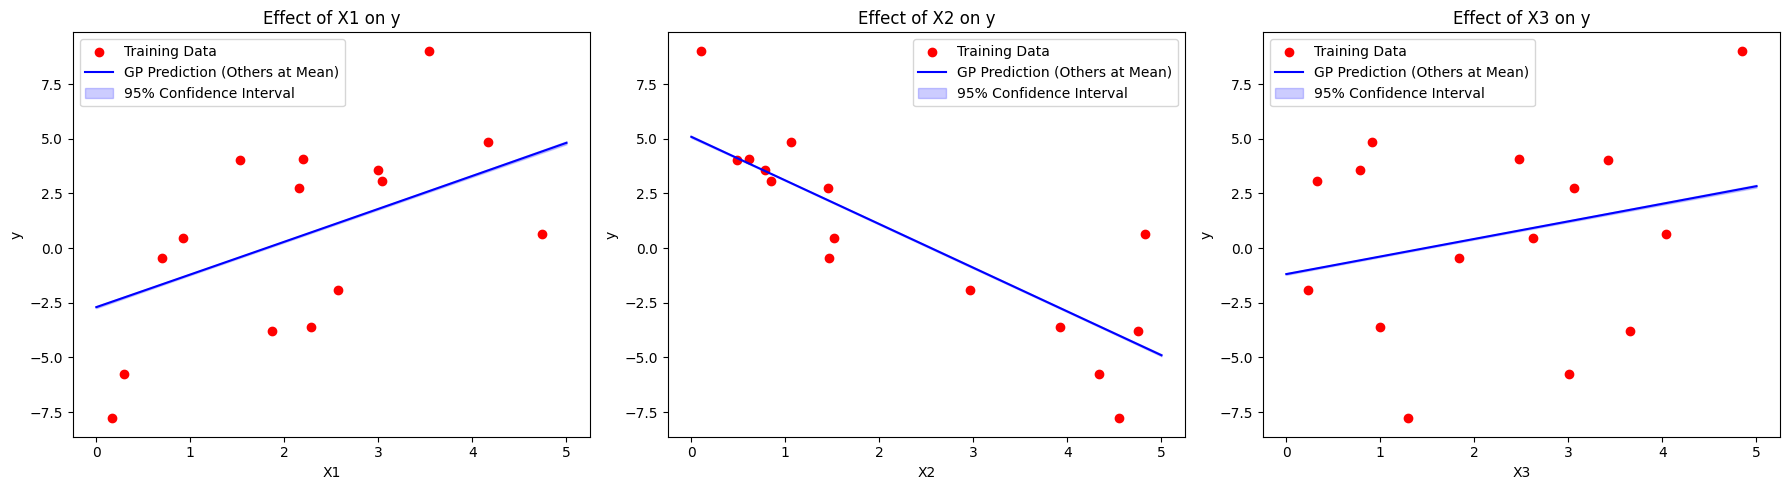

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# 1. 設定隨機種子與參數
np.random.seed(42)
n_samples = 15  # 稍微增加一點樣本數讓趨勢較明顯
a = np.array([1.5, -2.0, 0.8]) # 設定係數 a1, a2, a3
noise_var = 0.001

# 2. 生成多維資料 (X1, X2, X3)
X_train = np.random.uniform(0, 5, (n_samples, 3))
# y = a1*X1 + a2*X2 + a3*X3 + e
e = np.random.normal(0, np.sqrt(noise_var), n_samples)
y_train = np.dot(X_train, a) + e

# 3. 訓練高斯過程模型
# 多維資料通常建議使用具有長度縮放的 RBF kernel
kernel = C(1.0) * RBF(length_scale=[1.1, 1.3, 1.2]) 
gp = GaussianProcessRegressor(kernel=kernel, alpha=noise_var, n_restarts_optimizer=10)
gp.fit(X_train, y_train)

# 4. 繪圖邏輯：分別針對三個變數畫圖
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
feature_names = ['X1', 'X2', 'X3']

for i in range(3):
    # 建立預測區間：將欲觀測的 Xi 變動，其餘兩項固定在平均值
    x_range = np.linspace(0, 5, 100)
    X_test = np.zeros((100, 3))
    for j in range(3):
        if i == j:
            X_test[:, j] = x_range
        else:
            X_test[:, j] = np.mean(X_train[:, j])
    
    # 進行預測
    y_pred, sigma = gp.predict(X_test, return_std=True)
    
    # 繪圖
    ax = axes[i]
    # 畫出原始訓練點 (投影到該維度)
    ax.scatter(X_train[:, i], y_train, color='red', label='Training Data')
    # 畫出預測線
    ax.plot(x_range, y_pred, 'b-', label='GP Prediction (Others at Mean)')
    # 畫出信心區間
    ax.fill_between(x_range, y_pred - 1.96 * sigma, y_pred + 1.96 * sigma, 
                    alpha=0.2, color='blue', label='95% Confidence Interval')
    
    ax.set_title(f'Effect of {feature_names[i]} on y')
    ax.set_xlabel(feature_names[i])
    ax.set_ylabel('y')
    ax.legend()

plt.tight_layout()
plt.show()

In [5]:
X_test

array([[2.21084347, 2.24540872, 0.        ],
       [2.21084347, 2.24540872, 0.05050505],
       [2.21084347, 2.24540872, 0.1010101 ],
       [2.21084347, 2.24540872, 0.15151515],
       [2.21084347, 2.24540872, 0.2020202 ],
       [2.21084347, 2.24540872, 0.25252525],
       [2.21084347, 2.24540872, 0.3030303 ],
       [2.21084347, 2.24540872, 0.35353535],
       [2.21084347, 2.24540872, 0.4040404 ],
       [2.21084347, 2.24540872, 0.45454545],
       [2.21084347, 2.24540872, 0.50505051],
       [2.21084347, 2.24540872, 0.55555556],
       [2.21084347, 2.24540872, 0.60606061],
       [2.21084347, 2.24540872, 0.65656566],
       [2.21084347, 2.24540872, 0.70707071],
       [2.21084347, 2.24540872, 0.75757576],
       [2.21084347, 2.24540872, 0.80808081],
       [2.21084347, 2.24540872, 0.85858586],
       [2.21084347, 2.24540872, 0.90909091],
       [2.21084347, 2.24540872, 0.95959596],
       [2.21084347, 2.24540872, 1.01010101],
       [2.21084347, 2.24540872, 1.06060606],
       [2.